In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from matplotlib.patches import Circle
import os
import pickle
from scipy.stats import mannwhitneyu, ttest_ind, kruskal, f_oneway
from statannotations.Annotator import Annotator
from itertools import combinations
import sys
sys.path.append('../scripts') 
from functions import *
from config import nutrient_info, conversion_factors

In [2]:
df_food_scaled = pd.read_csv('../data/df_food_scaled.csv')

C:\Users\Sophie\AppData\Local\Temp\ipykernel_8428\2711278687.py:1: DtypeWarning: Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food_scaled = pd.read_csv('../data/df_food_scaled.csv')


In [3]:
qualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'qualifying'}
disqualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'disqualifying'}

In [4]:
df_fruits = df_food_scaled[df_food_scaled['food_group'] == 'fruits']
df_fruits.drop_duplicates('combined_name')[['combined_name', 'QI', 'DI', 'NB']].sort_values('QI', ascending=False)

,combined_name,QI,DI,NB
306121,Andros - Apfel-Pfirsich und Aprikosenmus,162.521394,0.568540,56.568098
294314,ANDROS FRUIT ME UP! Apple Mango,149.719034,0.600302,54.023968
306117,Andros - Apfel-Banane-Erdbeerenmus,146.902030,0.580539,54.494243
305671,Fruchtmus Apfel & Ananas,138.859468,0.597358,52.640407
290379,Andros Les Compotes Apples / Pineapple Passion,136.345622,0.605089,52.713598
...,...,...,...,...
316383,Freshona - Bio Fruchtpüree (Apfel und Birne),0.014493,0.527902,1.449275
312233,Sweet Valley - Apfelmus,0.013256,0.604156,1.325557
311110,"McEnnedy - Cranberries, sweetened and dried",0.003225,0.578659,0.322539
315750,Migros - Getrocknete Aronia Beeren,0.002865,0.014694,0.286533


In [5]:
high_qi_fruits = df_fruits[df_fruits['QI'] > 10].drop_duplicates('combined_name').sort_values('QI', ascending=False)
high_qi_fruits[['combined_name', 'QI', 'DI', 'NB']]

,combined_name,QI,DI,NB
306121,Andros - Apfel-Pfirsich und Aprikosenmus,162.521394,0.568540,56.568098
294021,Andros - Apfel,162.495122,0.585561,55.643029
294314,ANDROS FRUIT ME UP! Apple Mango,149.719034,0.600302,54.023968
306117,Andros - Apfel-Banane-Erdbeerenmus,146.902030,0.580539,54.494243
305671,Fruchtmus Apfel & Ananas,138.859468,0.597358,52.640407
290379,Andros Les Compotes Apples / Pineapple Passion,136.345622,0.605089,52.713598
282079,M Classic Apple and banana compote,123.198757,0.672782,51.700641
299414,M-Classic Applesauce without added sugar,117.478547,0.723782,50.595394
273759,Fruit compotes,74.859202,0.562213,44.362794


In [6]:
ratio_cols = [i for i in high_qi_fruits.columns if '_ratio_scaled' in i]

df_corr = high_qi_fruits[ratio_cols + ['QI']]
corr = df_corr.corr()['QI']
corr.sort_values(ascending=True)

salt_eaten_ratio_scaled                                     -0.822902
fatty_acids_saturated_eaten_ratio_scaled                    -0.356669
fat_eaten_ratio_scaled                                       0.233490
sugar_eaten_ratio_scaled                                     0.374961
protein_eaten_ratio_scaled                                   0.589904
fiber_eaten_ratio_scaled                                     0.880002
vitamin_c_eaten_ratio_scaled                                 0.960732
phosphorus_eaten_ratio_scaled                                1.000000
vitamin_b2_eaten_ratio_scaled                                1.000000
niacin_eaten_ratio_scaled                                    1.000000
folate_eaten_ratio_scaled                                    1.000000
zinc_eaten_ratio_scaled                                      1.000000
iron_eaten_ratio_scaled                                      1.000000
magnesium_eaten_ratio_scaled                                 1.000000
vitamin_b6_eaten_rat

## Vitamin b2

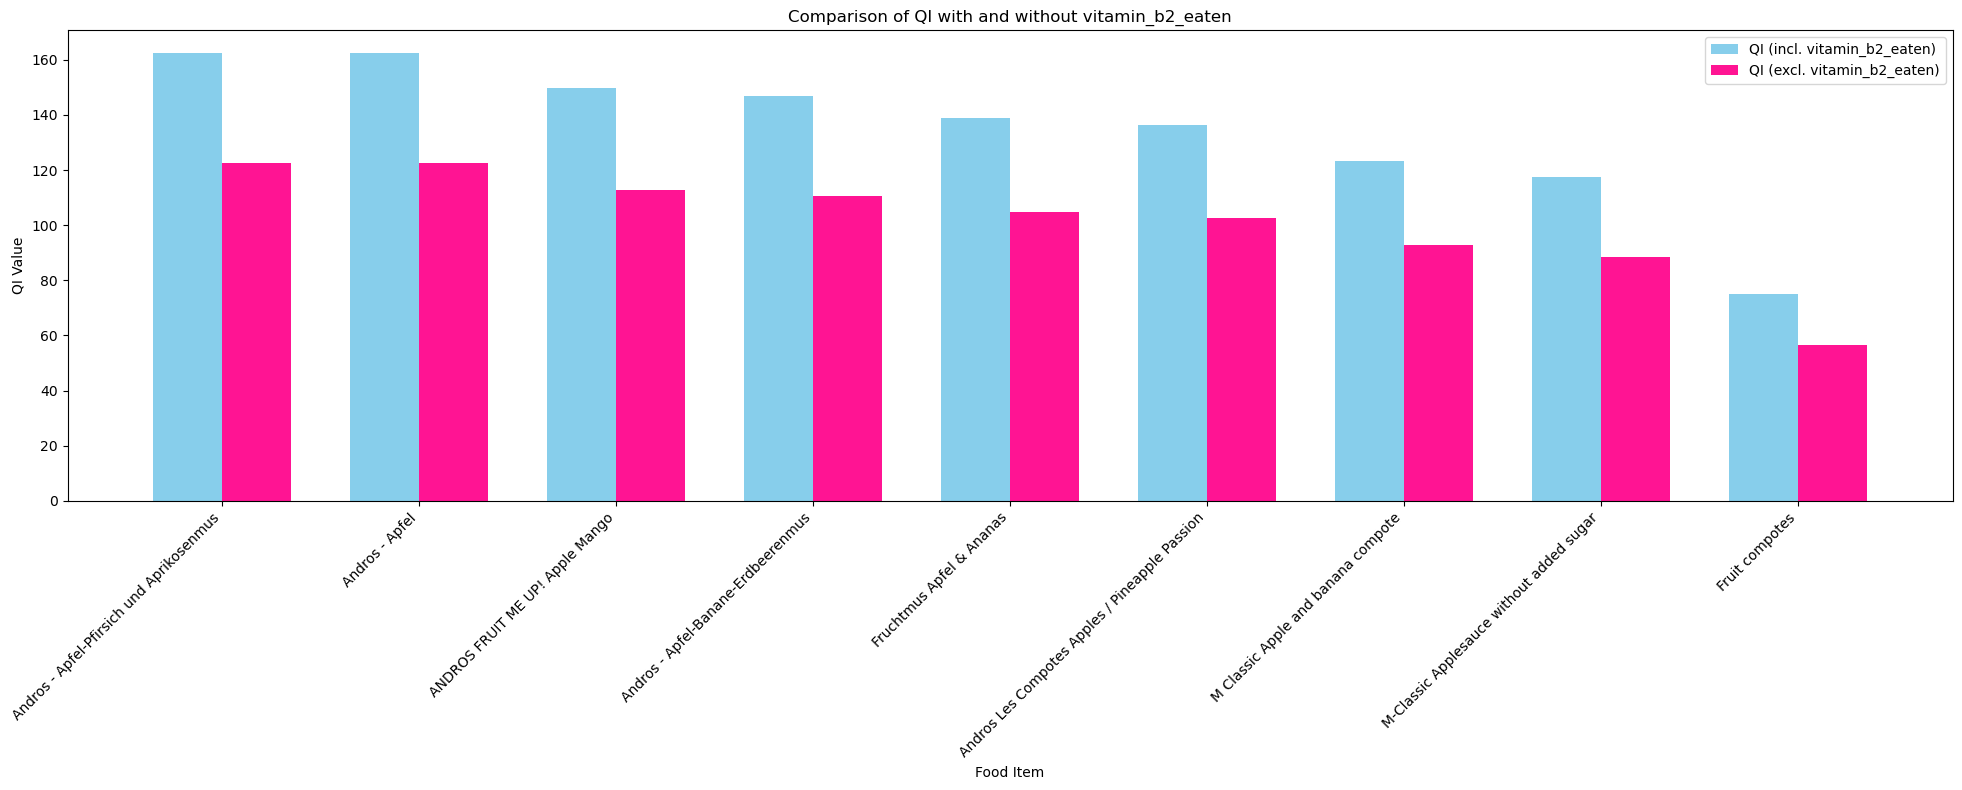

,combined_name,QI,QI_excl_vitamin_b2_eaten,QI_diff,QI_pct_change
306121,Andros - Apfel-Pfirsich und Aprikosenmus,162.521394,122.525230,39.996164,24.609784
294021,Andros - Apfel,162.495122,122.496039,39.999084,24.615560
294314,ANDROS FRUIT ME UP! Apple Mango,149.719034,112.853648,36.865386,24.623046
306117,Andros - Apfel-Banane-Erdbeerenmus,146.902030,110.752505,36.149525,24.607914
305671,Fruchtmus Apfel & Ananas,138.859468,104.678433,34.181035,24.615560
290379,Andros Les Compotes Apples / Pineapple Passion,136.345622,102.771161,33.574461,24.624524
282079,M Classic Apple and banana compote,123.198757,92.878757,30.320000,24.610638
299414,M-Classic Applesauce without added sugar,117.478547,88.554141,28.924406,24.621011
273759,Fruit compotes,74.859202,56.426474,18.432728,24.623196


In [7]:
df_fruit_vitamin_b2 = compare_qi_excluding_nutrient(df=high_qi_fruits, nutrient_to_exclude='vitamin_b2_eaten', qualifying_nutrients=qualifying_nutrients)

df_fruit_vitamin_b2

## Vitamin b1

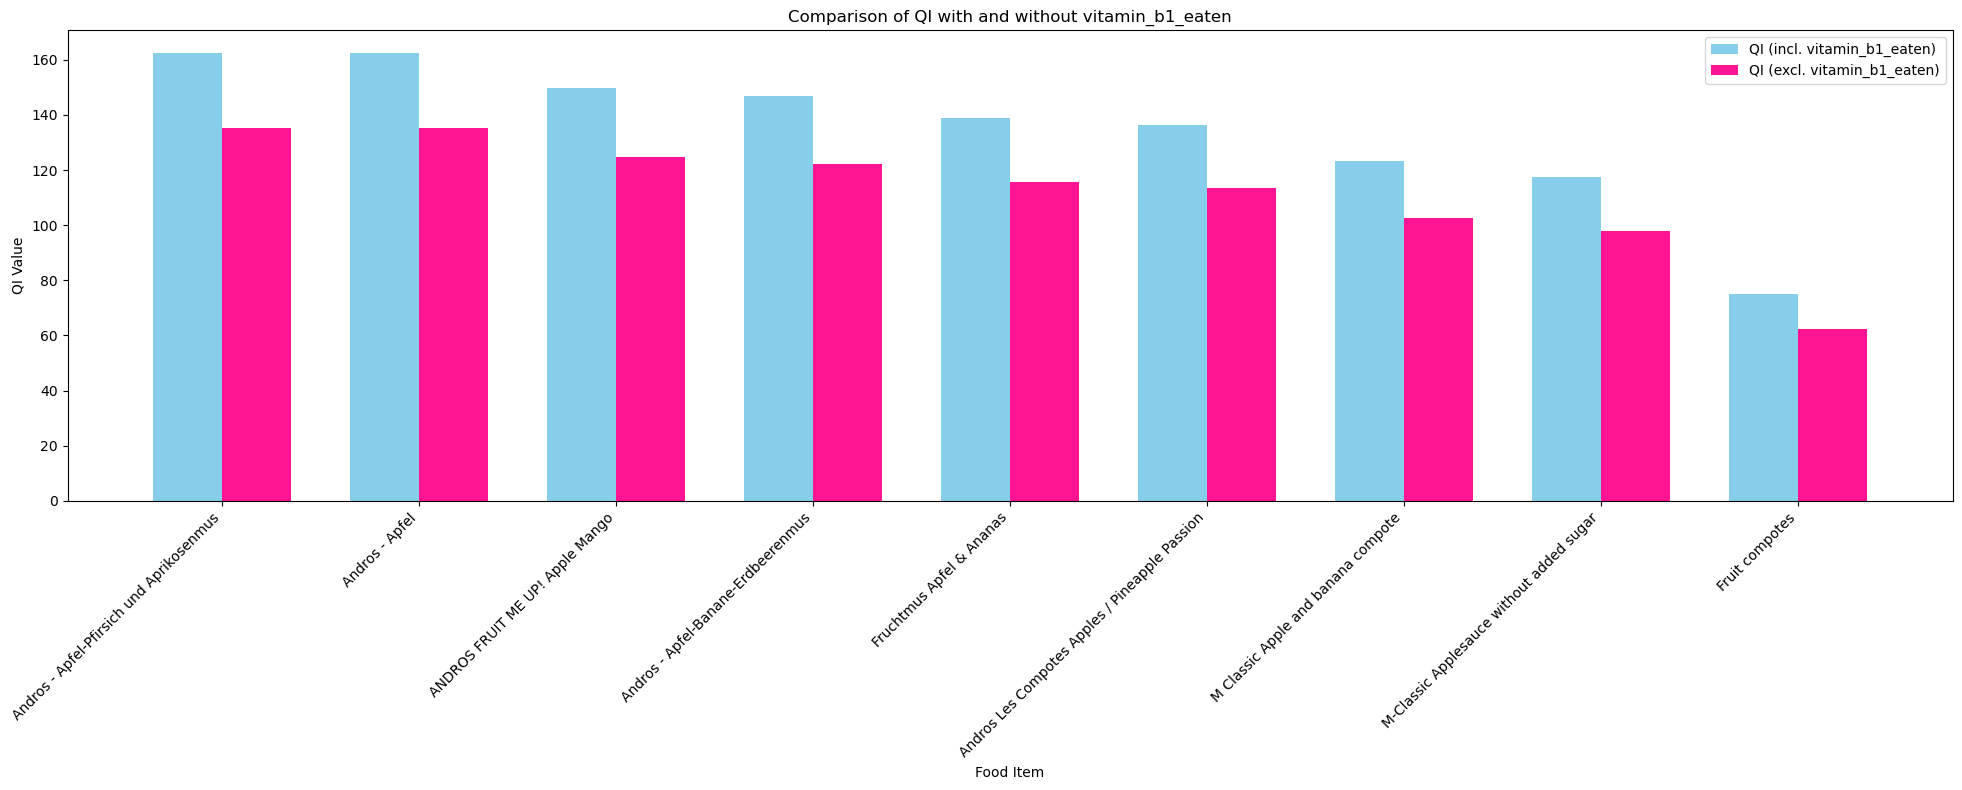

,combined_name,QI,QI_excl_vitamin_b1_eaten,QI_diff,QI_pct_change
306121,Andros - Apfel-Pfirsich und Aprikosenmus,162.521394,135.241041,27.280354,16.785700
294021,Andros - Apfel,162.495122,135.211849,27.283273,16.790210
294314,ANDROS FRUIT ME UP! Apple Mango,149.719034,124.572140,25.146894,16.796057
306117,Andros - Apfel-Banane-Erdbeerenmus,146.902030,122.245641,24.656388,16.784239
305671,Fruchtmus Apfel & Ananas,138.859468,115.544671,23.314797,16.790210
290379,Andros Les Compotes Apples / Pineapple Passion,136.345622,113.443359,22.902263,16.797212
282079,M Classic Apple and banana compote,123.198757,102.518161,20.680596,16.786367
299414,M-Classic Applesauce without added sugar,117.478547,97.748650,19.729897,16.794468
273759,Fruit compotes,74.859202,62.285720,12.573482,16.796175


In [8]:
df_fruit_vitamin_b1 = compare_qi_excluding_nutrient(df=high_qi_fruits, nutrient_to_exclude='vitamin_b1_eaten', qualifying_nutrients=qualifying_nutrients)

df_fruit_vitamin_b1

## Vitamin b6

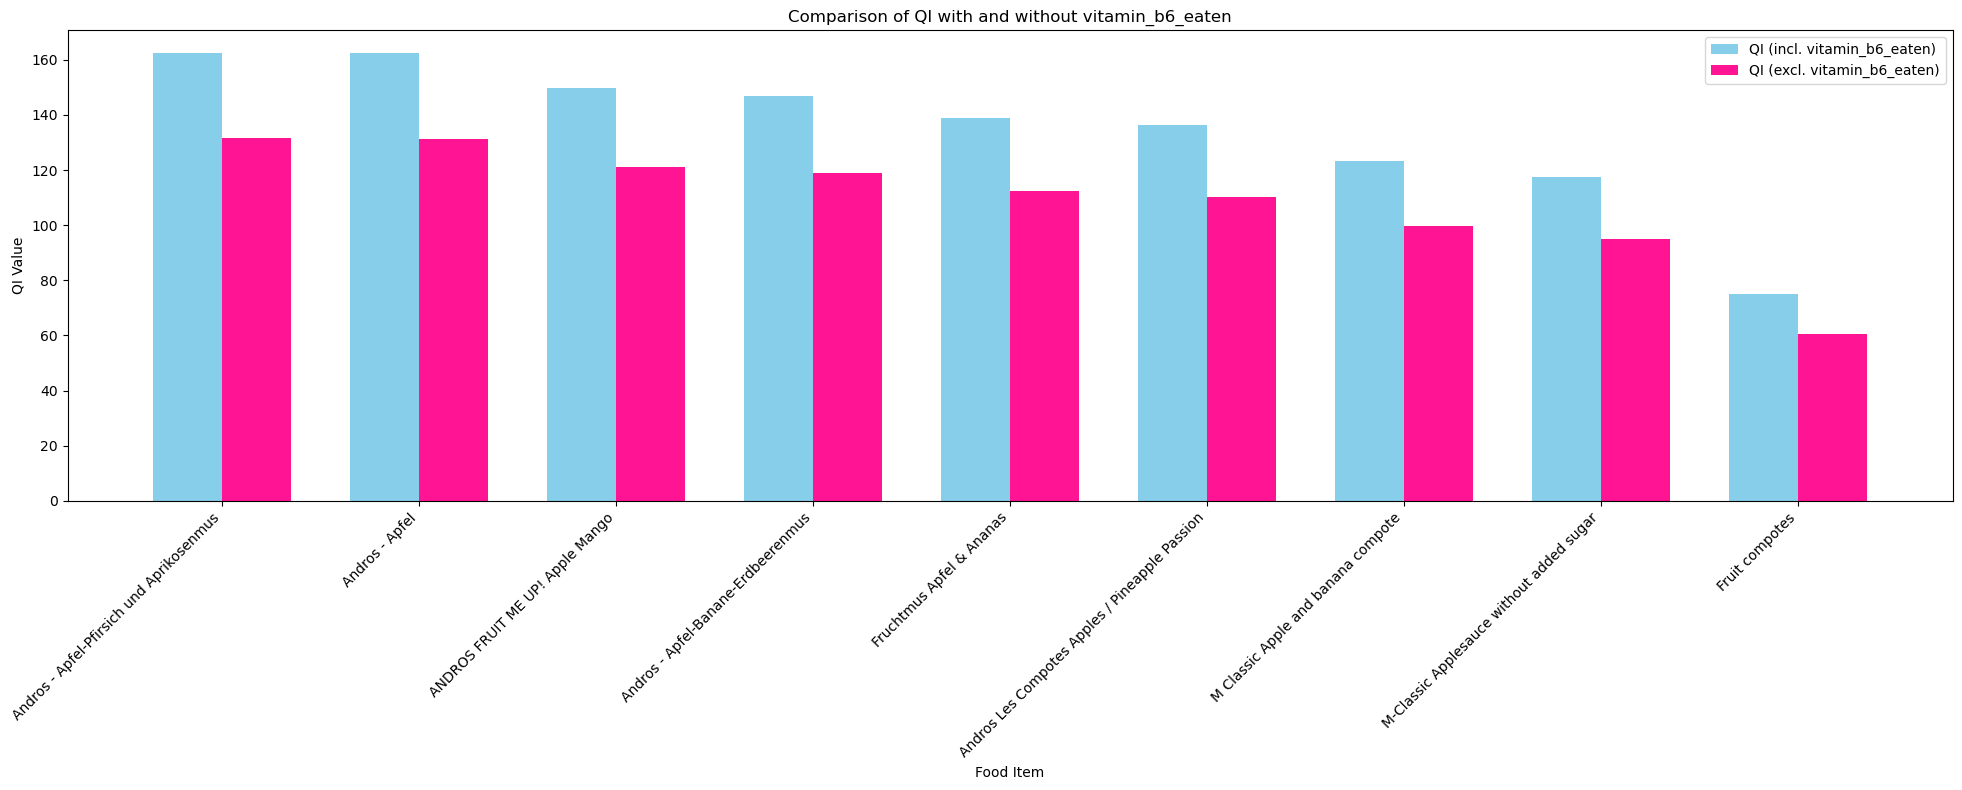

,combined_name,QI,QI_excl_vitamin_b6_eaten,QI_diff,QI_pct_change
306121,Andros - Apfel-Pfirsich und Aprikosenmus,162.521394,131.452473,31.068922,19.116819
294021,Andros - Apfel,162.495122,131.423282,31.071841,19.121707
294314,ANDROS FRUIT ME UP! Apple Mango,149.719034,121.080715,28.638319,19.128042
306117,Andros - Apfel-Banane-Erdbeerenmus,146.902030,118.821359,28.080671,19.115237
305671,Fruchtmus Apfel & Ananas,138.859468,112.307168,26.552300,19.121707
290379,Andros Les Compotes Apples / Pineapple Passion,136.345622,110.263668,26.081953,19.129293
282079,M Classic Apple and banana compote,123.198757,99.646183,23.552574,19.117542
299414,M-Classic Applesauce without added sugar,117.478547,95.009224,22.469323,19.126320
273759,Fruit compotes,74.859202,60.540007,14.319195,19.128169


In [9]:
df_fruit_vitamin_b6 = compare_qi_excluding_nutrient(df=high_qi_fruits, nutrient_to_exclude='vitamin_b6_eaten', qualifying_nutrients=qualifying_nutrients)

df_fruit_vitamin_b6

## Pantothenic acid

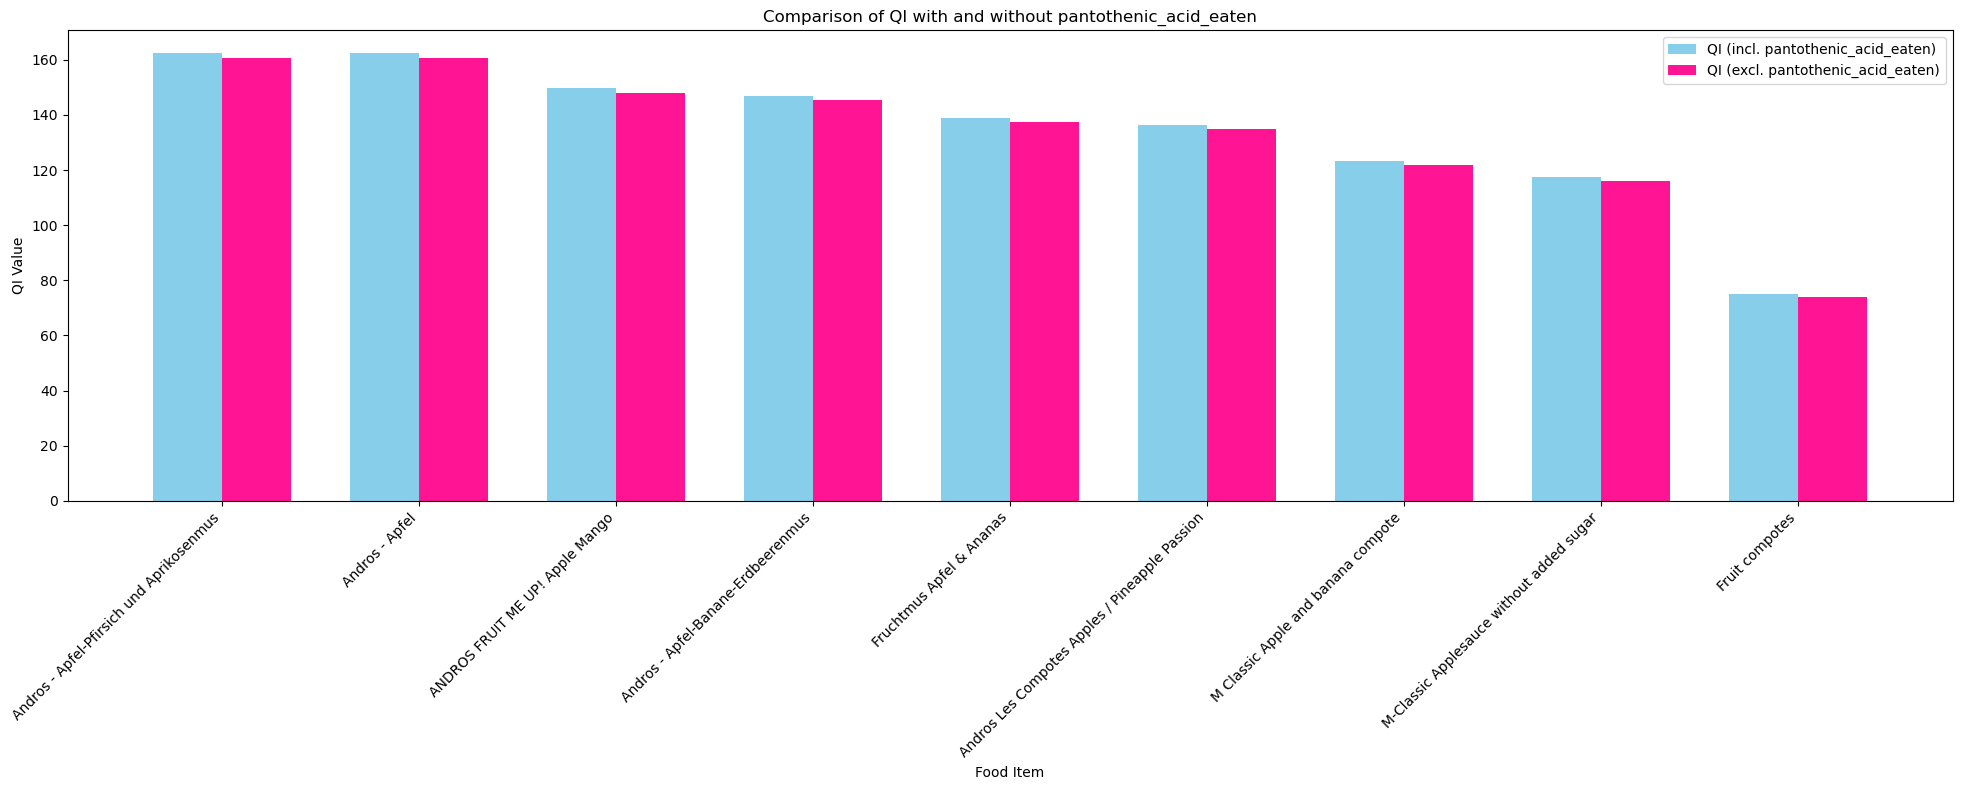

,combined_name,QI,QI_excl_pantothenic_acid_eaten,QI_diff,QI_pct_change
306121,Andros - Apfel-Pfirsich und Aprikosenmus,162.521394,160.694153,1.827241,1.124308
294021,Andros - Apfel,162.495122,160.664962,1.830160,1.126286
294314,ANDROS FRUIT ME UP! Apple Mango,149.719034,148.028930,1.690104,1.128851
306117,Andros - Apfel-Banane-Erdbeerenmus,146.902030,145.251339,1.650690,1.123667
305671,Fruchtmus Apfel & Ananas,138.859468,137.295513,1.563955,1.126286
290379,Andros Les Compotes Apples / Pineapple Passion,136.345622,134.805793,1.539829,1.129357
282079,M Classic Apple and banana compote,123.198757,121.813263,1.385494,1.124601
299414,M-Classic Applesauce without added sugar,117.478547,116.153208,1.325339,1.128154
273759,Fruit compotes,74.859202,74.014115,0.845087,1.128902


In [10]:
df_fruit_pantothenic_acid = compare_qi_excluding_nutrient(df=high_qi_fruits, nutrient_to_exclude='pantothenic_acid_eaten', qualifying_nutrients=qualifying_nutrients)

df_fruit_pantothenic_acid

In [11]:
exclude_list = ['vitamin_b1_eaten', 'vitamin_b2_eaten', 'vitamin_b6_eaten', 'pantothenic_acid_eaten']
qualifying_nutrients = list(nutrient_info.keys())

for idx, row in high_qi_fruits.iterrows():

    qi_incl = compute_qi_excluding_multiple(row, qualifying_nutrients, exclude_list=[])
    qi_excl = compute_qi_excluding_multiple(row, qualifying_nutrients, exclude_list=exclude_list)

    print(f"Food: {row['combined_name']}")
    print(f"QI (incl. all): {qi_incl}")
    print(f"QI (excl. {', '.join(exclude_list)}): {qi_excl}")
    print("-----------")


Food: Andros - Apfel-Pfirsich und Aprikosenmus
QI (incl. all): 130.13411218368392
QI (excl. vitamin_b1_eaten, vitamin_b2_eaten, vitamin_b6_eaten, pantothenic_acid_eaten): 7.238984653621704
-----------
Food: Andros - Apfel
QI (incl. all): 130.1171797137487
QI (excl. vitamin_b1_eaten, vitamin_b2_eaten, vitamin_b6_eaten, pantothenic_acid_eaten): 7.218826951317841
-----------
Food: ANDROS FRUIT ME UP! Apple Mango
QI (incl. all): 119.90137275781865
QI (excl. vitamin_b1_eaten, vitamin_b2_eaten, vitamin_b6_eaten, pantothenic_acid_eaten): 6.640099256316351
-----------
Food: Andros - Apfel-Banane-Erdbeerenmus
QI (incl. all): 117.64337062756049
QI (excl. vitamin_b1_eaten, vitamin_b2_eaten, vitamin_b6_eaten, pantothenic_acid_eaten): 6.569302063300936
-----------
Food: Fruchtmus Apfel & Ananas
QI (incl. all): 111.21431720993068
QI (excl. vitamin_b1_eaten, vitamin_b2_eaten, vitamin_b6_eaten, pantothenic_acid_eaten): 6.196521386104509
-----------
Food: Andros Les Compotes Apples / Pineapple Passion
